## Prediction heart disease using ML
Approach:
1. Data
2. Evaluation
3. Features
5. Modelling
6. Experimentation

### Problem defination

In a statement 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### Data
>The data came from UCI Machine Learning Repository

### Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

### Features

Getting information about different features
We get information about various feature their role in prediction.

**Create Data Dictionary**
1. age (Age of the patient in years)
2. sex (Male- 1/Female- 0)
3. cp chest pain type ([0 -typical angina,1 - atypical angina,2 -  non-anginal, 3 -asymptomatic])
4. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
5. chol (serum cholesterol in mg/dl), above 200 is cause for concern
6. fbs (if fasting blood sugar > 120 mg/dl)(1=true; 0=false)  - >126 signals diabities
7. restecg (resting electrocardiographic results)
-- Values: [0 - normal, 1 - stt abnormality, 2 - lv hypertrophy]
8. thalach: maximum heart rate achieved
9. exang: exercise-induced angina (1 = True/ 2 - False)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment, 0: upsloping better heart rate with exercise(uncommon), 1: Flatslopping minimal change (typical healthy heart), 2: Downsloping (sign of unhealthy heard)
12. ca: number of major vessels (0-3) colored by fluoroscopy
13. thal: [1-3: normal;6: fixed defect;7: reversible defect]
14. target: the predicted attribute


In [1]:
# tools for data manipulation and EDA(Exploratory data analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model from sklearn
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('../data/heart-disease.csv') # dataset from UCI

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


all the columns are numerical

## EXPLORATORY DATA ANALYSIS

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# How many of each class
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

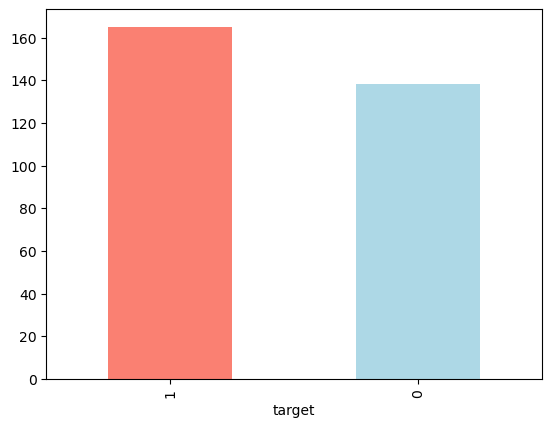

In [9]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);
plt.show()

the values is somewhat in same amount in both class

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no missing values

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequesncy to Sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


sex: 0 - Female, sex: 1 - Male
target: 0 - no heart disease, target:1 - heart disease

Based on our existing dataset
**Total female 96** and **femal with heart disease 72** we can say roughly **70% women have heart disease**

**Total male 207** and **male with heart disease 93** we can say roughly **50% men have heart disease**

And on **total 303** **72+93* have heart disease roughly **60%** have heart disease 

so, From **Sex** feature we might infer that a person may have 60% chance of having a heart disease.

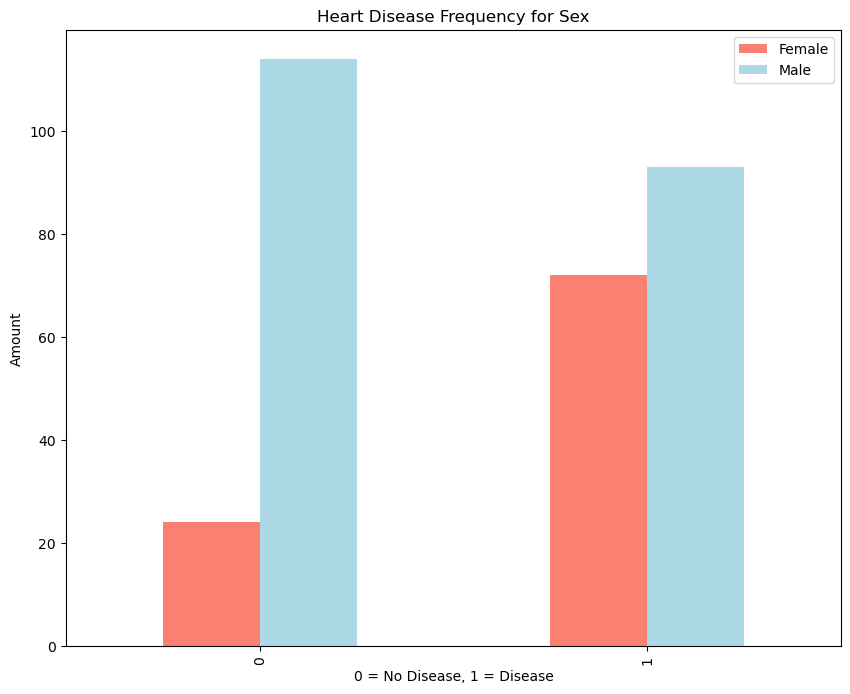

In [14]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,8),color=['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.show()

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Age vs Max Heart Rate for Heart Disease

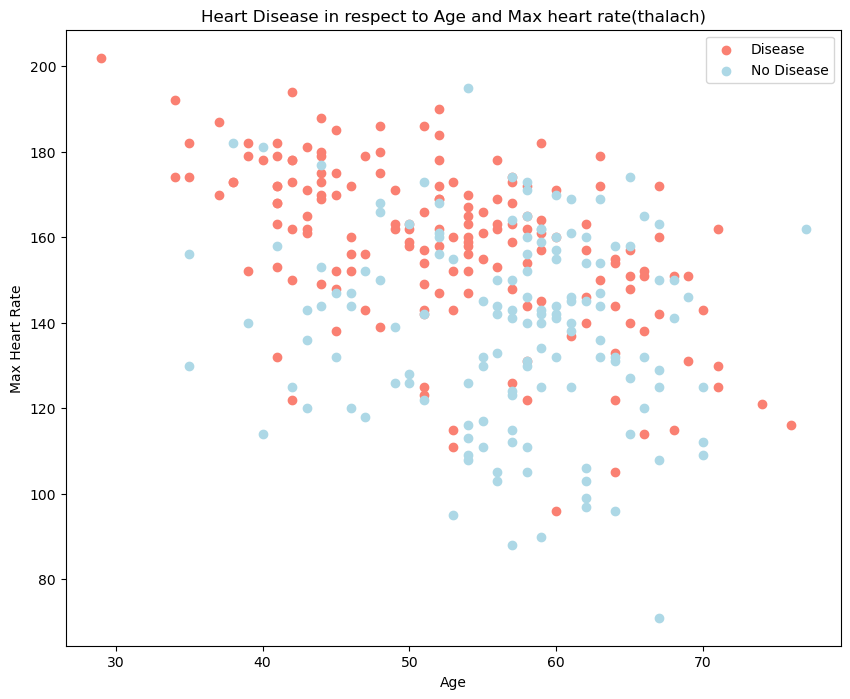

In [16]:
plt.figure(figsize=(10,8))

# scatter with positive example
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c='salmon')

# scatter with negative example
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c='lightblue')

plt.title('Heart Disease in respect to Age and Max heart rate(thalach)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

plt.show();

no particular defined seperation. 

But we can see that as someone grows older their max heart rate decreases

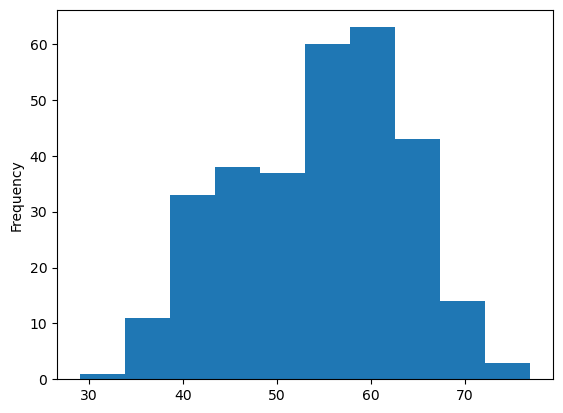

In [17]:
# Check the distribution of age column with a histogram
df.age.plot.hist()
plt.show()

### cheest pain and heart disease frequency 

 cp chest pain type ([0 -typical angina,1 - atypical angina,2 -  non-anginal, 3 -asymptomatic])
- 0: chest pain related decrease blood supply to heart
- 1: chest pain not related to heart
- 2: typically esophageal spasms(non heart related)
- 3: chest pain not showing sign of disease 

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Not heart related has the one with the highest number with heart disease (**MAD**)

This 

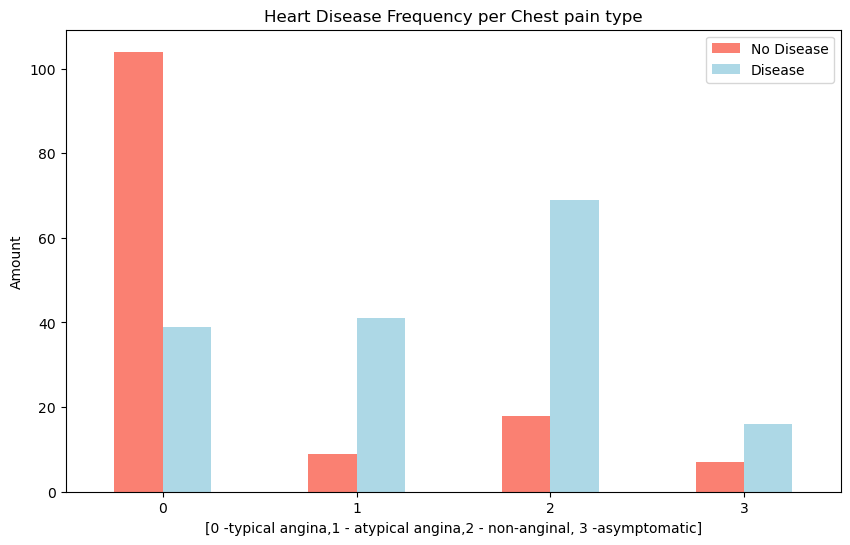

In [19]:
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10, 6))
plt.legend(['No Disease', 'Disease'])
plt.title('Heart Disease Frequency per Chest pain type')
plt.xlabel('[0 -typical angina,1 - atypical angina,2 - non-anginal, 3 -asymptomatic]')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### checking correlation betn independent and dependent variables

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


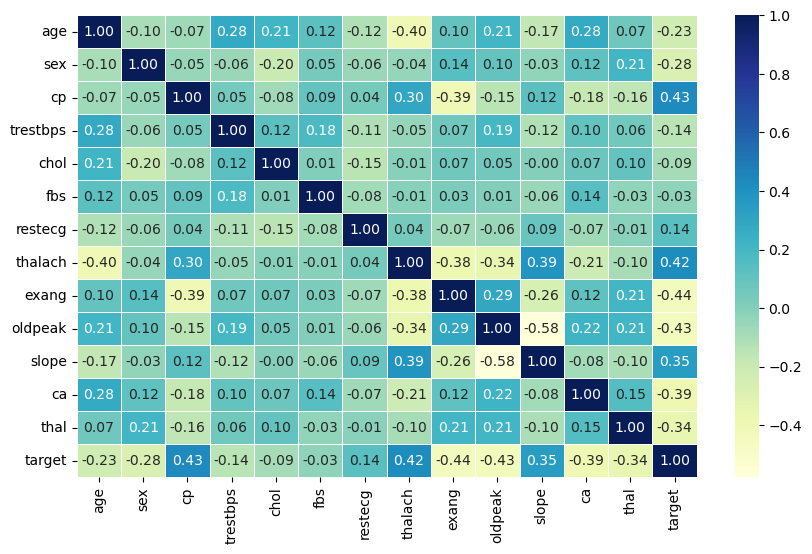

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(), annot=True, linewidths=0.5, fmt=".2f", cmap='YlGnBu')
plt.show()

- Higher positive value means potential positive correlation i.e. as one increases another might increases, Higher negative value means potential negative correlation i.e. as one goes up another may decrease


Examining the correlation value in **chest pain and target** (Corr betn cp and target is 0.43 so as target increases target should also increase
i.e no of 1 should increases as chest pain increases

<Figure size 800x600 with 0 Axes>

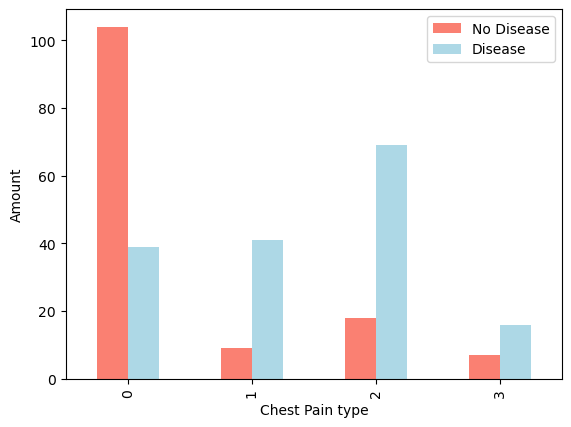

In [24]:
plt.figure(figsize=(8, 6))
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['salmon', 'lightblue'])
plt.ylabel('Amount')
plt.xlabel('Chest Pain type')
plt.legend(['No Disease', 'Disease'])
plt.show();

as cp increases for that value no of diseased also increase i.e ratio of Disease to no Disease increases

**Sex and target** have negative correlation

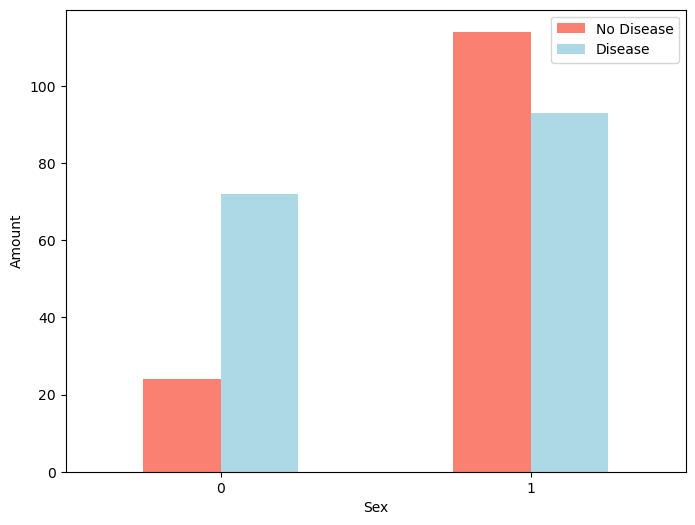

In [25]:
pd.crosstab(df.sex, df.target).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(8, 6))
plt.ylabel('Amount')
plt.xlabel('Sex')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show();

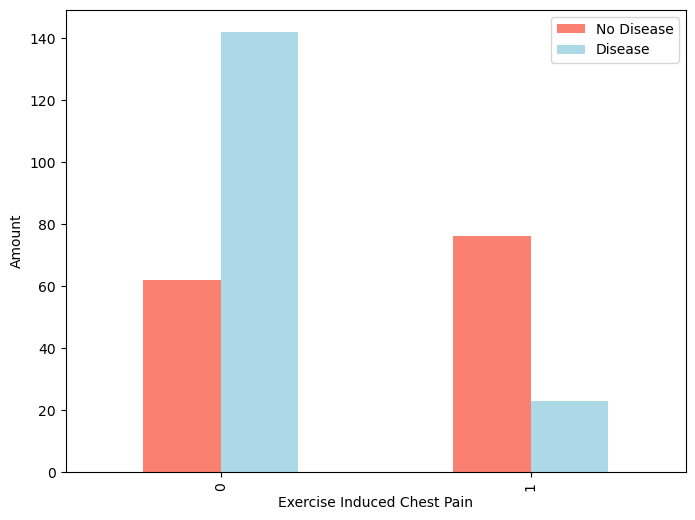

In [26]:
pd.crosstab(df.exang, df.target).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(8,6))
plt.ylabel('Amount')
plt.xlabel('Exercise Induced Chest Pain')
plt.legend(['No Disease', 'Disease'])
plt.show()

## Modeling

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
X = df.drop('target', axis=1)
y = df['target']

In [29]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


1. Train (Find the patterns) on training set
2. Test (Use the patterns) on the test set

In [33]:
models = {
    'Logistic Regression':LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# function training and fitting the data

def fit_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluate given machine learning models.
    '''
    np.random.seed(42)
    model_score = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)

    return model_score

In [34]:
performance = fit_score(models, X_train, y_train, X_test, y_test)
performance

C:\Users\ACER\Desktop\ml-and-data-analysis\Heart-Disease-Classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Different score of baseline model

**Comparing different models**

In [35]:
model_compare = pd.DataFrame(performance, index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


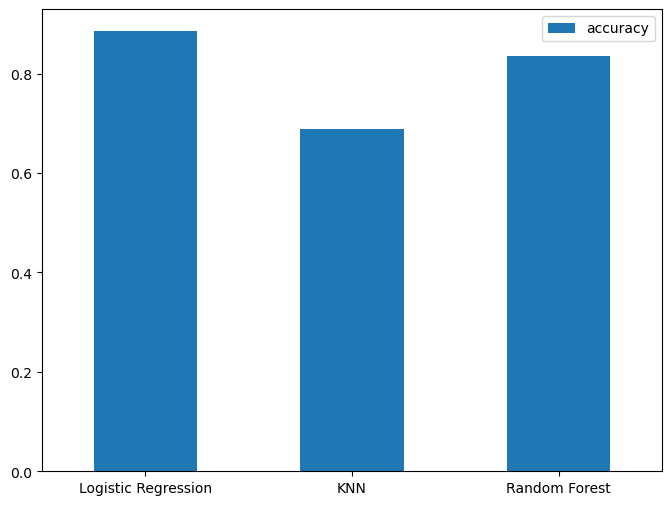

In [36]:
model_compare.T.plot(kind='bar', figsize=(8,6))
plt.xticks(rotation=0)
plt.show();

In [37]:
y_preds = models['Logistic Regression'].predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Hyperparameter tuning

In [38]:
# Just experimenting tuning KNN as it has the lowest score

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

print(train_scores, test_scores)
    

[1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058] [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


Maximum KNN score on the test data:  75.41


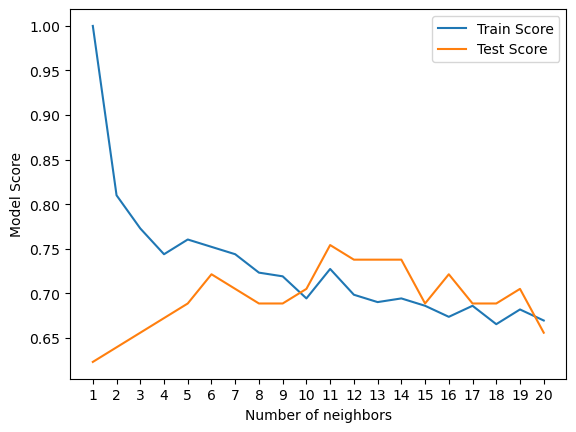

In [39]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1,21,1))
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores) * 100 : .2f}")
plt.show();

### Hyperparameter tuning with Randomized Search CV

- Using in built method from sklearm
model to Tune:
1. Random Forest Classifiel
2. Logistic Regression


In [40]:
# creating hyperparameter grid for Logistic Regression 
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth':[None, 3, 5, 10],
    'min_samples_split': np.arange(2,20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [41]:
tuned_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)

tuned_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
# checking the best parameters of tuned model from given parameter dictionary
tuned_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [43]:
tuned_log_reg.score(X_test, y_test)

0.8852459016393442

Score is same as above to imporve more range of value should be in the dictionary but for now 88.5 % accuracy is satisfactory

### Tuning RandomForestClassifier()

In [44]:
np.random.seed(42)

tuned_rfc = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               verbose=True, cv=5,
                               n_iter=20)
tuned_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
tuned_rfc.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

### Hyperparameter Tuning with gridsearchcv

In [46]:
log_reg_grid = {
    'C':np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
# best hyperparameters and score
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [48]:
# evaluationg gs_log_reg model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

the score haven't improved same as baseline model

## Evaluating our log regression classifier Using other metric

1. ROC curve and AUC score
2. Confusion matrix
3. Classification report
4. Recall 
5. F1 score

In [49]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
# Using ROC curve
from sklearn.metrics  import precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay, roc_auc_score

In [51]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)

In [52]:
auc = roc_auc_score(y_true=y_test, y_score=y_preds)
auc

np.float64(0.8841594827586207)

**AUC in baseline**

AUC: 0.8841594827586207


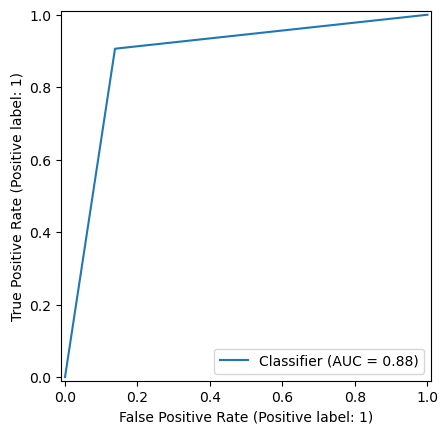

<Figure size 800x600 with 0 Axes>

In [53]:
print(f'AUC: {auc}')
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_preds)
plt.figure(figsize=(8,6))
plt.show();

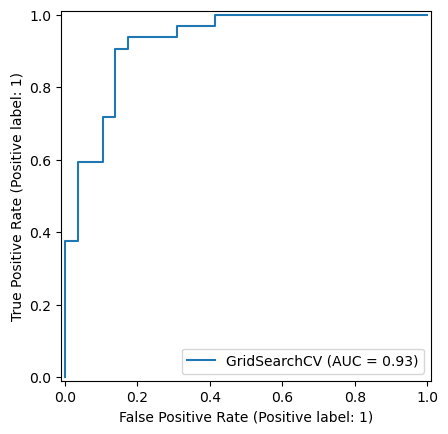

<Figure size 800x600 with 0 Axes>

In [54]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.figure(figsize=(8,6))
plt.show();

In [55]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)
print(
    conf_matrix
)


[[25  4]
 [ 3 29]]


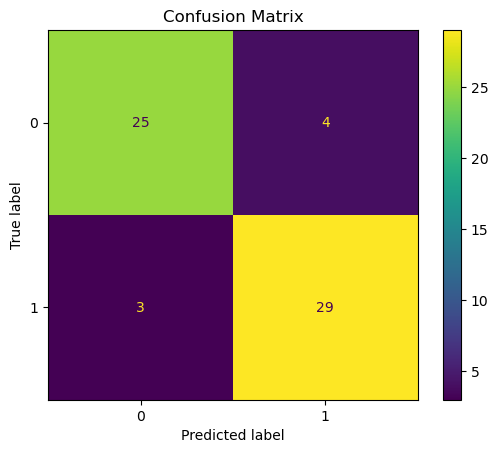

<Figure size 800x600 with 0 Axes>

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.title('Confusion Matrix')
plt.figure(figsize=(8,6))
plt.show();

### using evaluation metrics using cross-validation

using `cross_val_score`

In [57]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [58]:
model = LogisticRegression(C=0.20433597178569418, solver='liblinear')


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
# cv accuracy

cv_acc = cross_val_score(model, X, y, cv = 5, scoring='accuracy')
print(cv_acc)
cv_acc = np.mean(cv_acc)
cv_acc

[0.81967213 0.90163934 0.86885246 0.88333333 0.75      ]


np.float64(0.8446994535519124)

In [61]:
# cv precision 
cv_pre = cross_val_score(model, X, y, cv=5, scoring='precision')
cv_pre = np.mean(cv_pre)
cv_pre

np.float64(0.8207936507936507)

In [62]:
# cv recall
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [63]:
# cv f1 score
cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

In [64]:
# visualize our cross validated metrics

cv_metric = pd.DataFrame(
    {'Accuracy': cv_acc,
    'Precision': cv_pre,
    'Recall': cv_recall,
    'F1': cv_f1}, 
    index=[0]
)
cv_metric

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


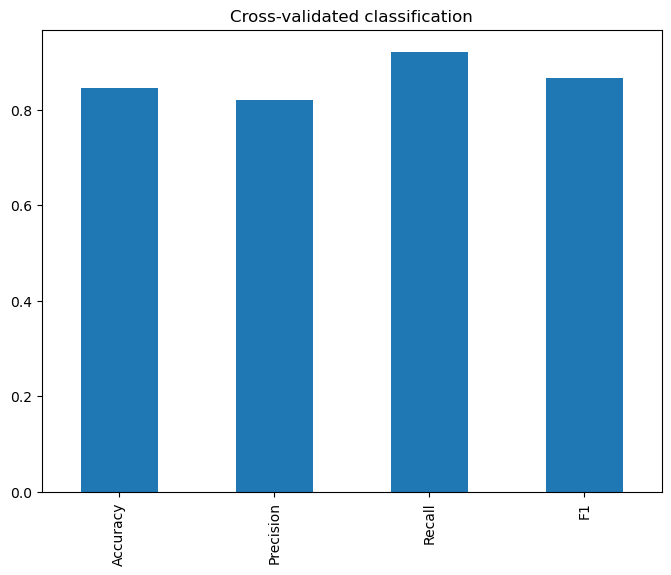

In [65]:
cv_metric.T.plot(kind='bar' ,title='Cross-validated classification', figsize=(8,6), legend=False)
plt.show()

## Feature importance

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [68]:
model = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [69]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8852459016393442

In [70]:
# looking in to the coefficient of each features
model.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [72]:
feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

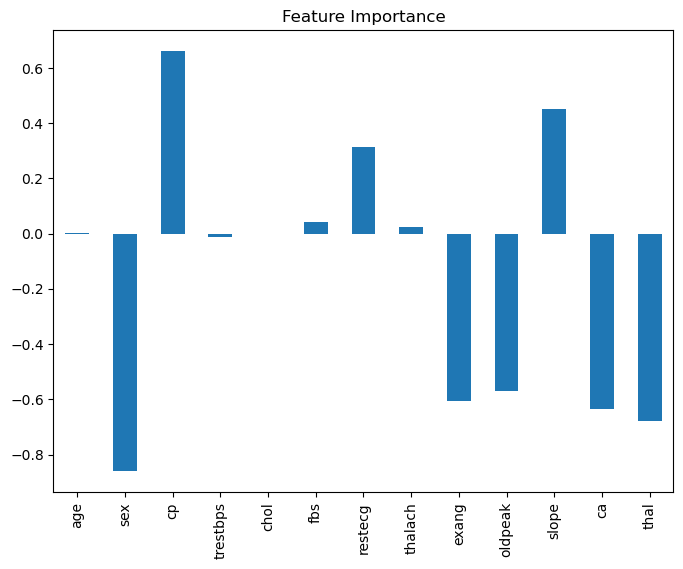

In [76]:
feature_imp_df = pd.DataFrame(feature_dict, index=[0])
feature_imp_df.T.plot(kind='bar', title='Feature Importance', legend=False, figsize=(8,6))
plt.show();

**Create Data Dictionary**
1. age (Age of the patient in years)
2. sex (Male- 1/Female- 0)
3. cp chest pain type ([0 -typical angina,1 - atypical angina,2 -  non-anginal, 3 -asymptomatic])
4. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
5. chol (serum cholesterol in mg/dl), above 200 is cause for concern
6. fbs (if fasting blood sugar > 120 mg/dl)(1=true; 0=false)  - >126 signals diabities
7. restecg (resting electrocardiographic results)
-- Values: [0 - normal, 1 - stt abnormality, 2 - lv hypertrophy]
8. thalach: maximum heart rate achieved
9. exang: exercise-induced angina (1 = True/ 2 - False)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment, 0: upsloping better heart rate with exercise(uncommon), 1: Flatslopping minimal change (typical healthy heart), 2: Downsloping (sign of unhealthy heard)
12. ca: number of major vessels (0-3) colored by fluoroscopy
13. thal: [1-3: normal;6: fixed defect;7: reversible defect]
14. target: the predicted attribute


Here trestbps, chol, age, fbs have really low coefficient so we can discard these columns and train the model agian
cols_that_can_be_dropped = (age, chol, fbs)

Looking at the correlation data sex has the highest negative correlation and from the feature importance graph we see that sex has highest negative contributes to the target variable on the positive side it is also the same chest pain has the highest positive correlation with target and from above graph we see that cp has highest contribution to the target
We see the ratio of target(1) to target(0) for respective correlation

In [82]:
# Some values with high contribution to our target
pd.crosstab(df.sex, df.target) # as sex increases the model is likely to predict less heart disease. (0= Female, 1 = Male)

target,0,1
sex,,
0,24,72
1,114,93


In [83]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: the slope of the peak exercise ST segment, 0: upsloping better heart rate with exercise(uncommon), 1: Flatslopping minimal change (typical healthy heart), 2: Downsloping (sign of unhealthy heard)

In [84]:
pd.crosstab(df.cp, df.target)  #as chest pain increasese the model is likely to predict heart disease

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
